In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, classification_report

In [6]:
# Load dataset
data = pd.read_csv('Copy-of-loan.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2  

In [7]:
# Data Preprocessing
# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Label Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

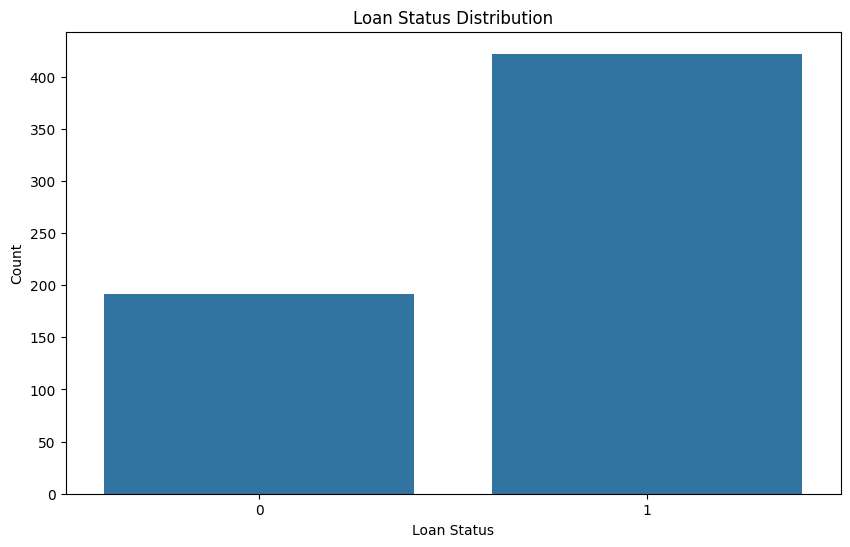

In [8]:
# Splitting data into features and target
X = data.drop(columns=['Loan_Status'])  # Replace 'Loan_Status' with actual target column if different
y = data['Loan_Status']

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

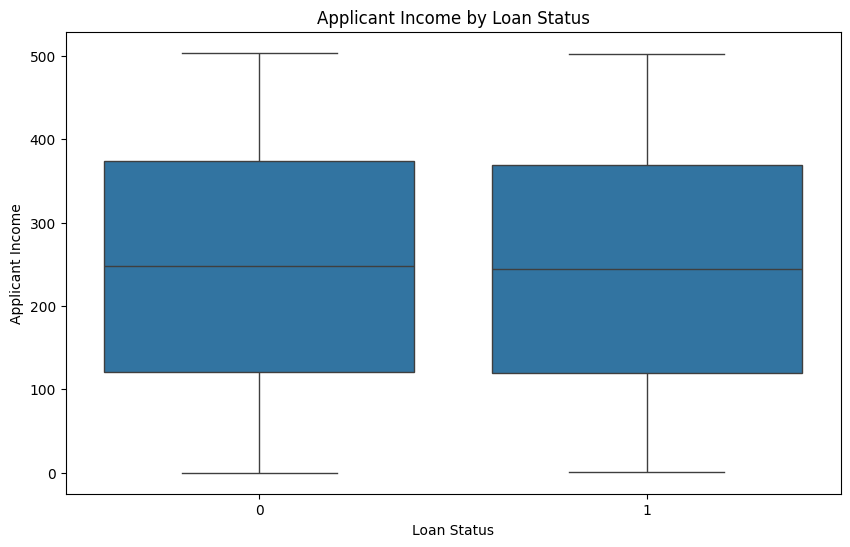

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.title('Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

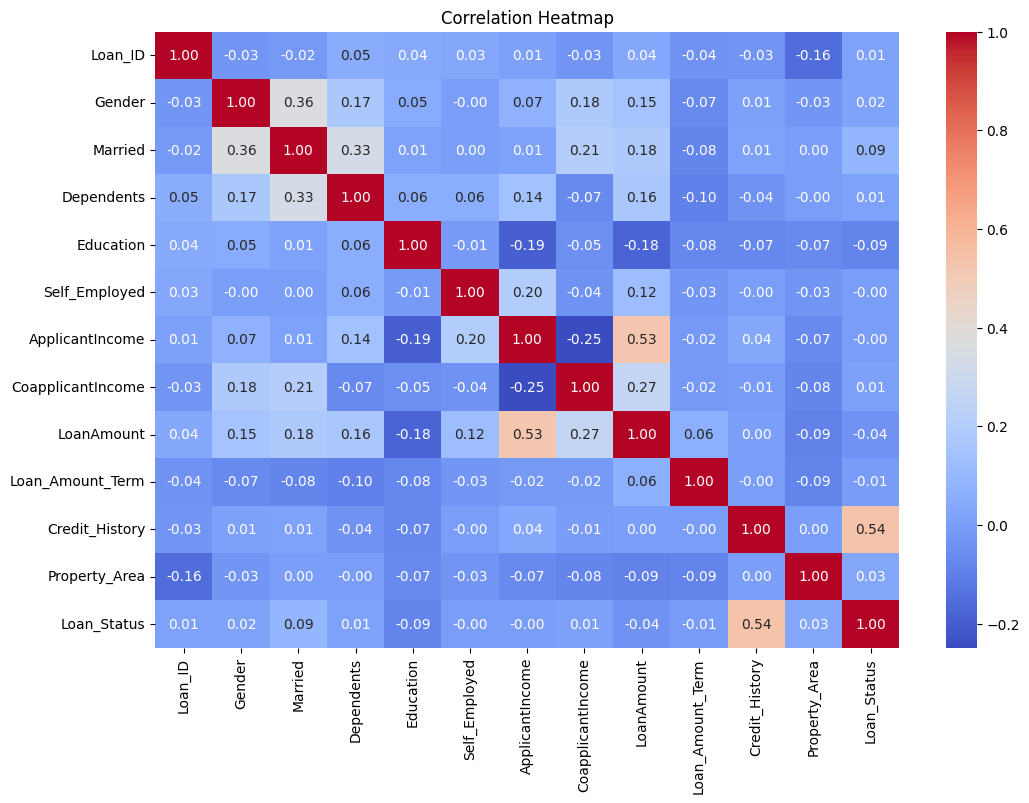

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [12]:
results={}

for name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    mcc = matthews_corrcoef(y_test, y_pred)

    results[name] = {
        'CrossValMeanROC_AUC': scores.mean(),
        'TestROC_AUC': roc_auc,
        'MCC': mcc
    }


c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

In [13]:
# Best Model: RandomForestClassifier
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [14]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



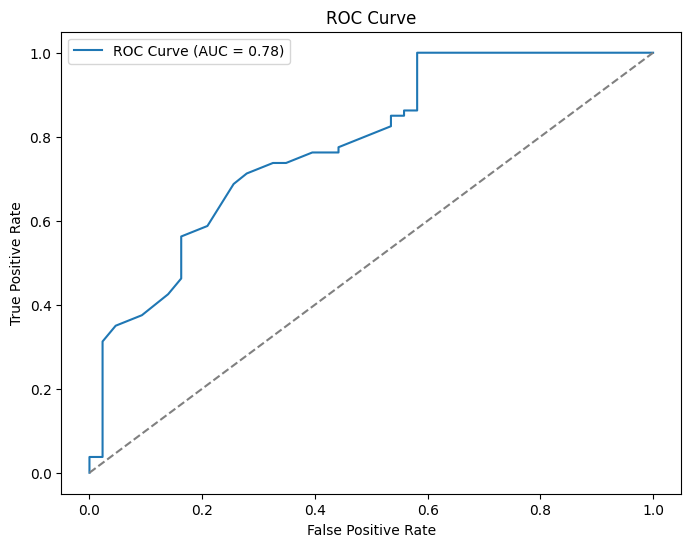

In [15]:
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [16]:
# Summary of Results
print("Model Evaluation Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


Model Evaluation Summary:
RandomForestClassifier: {'CrossValMeanROC_AUC': np.float64(0.7868661257606491), 'TestROC_AUC': np.float64(0.7811046511627906), 'MCC': np.float64(0.5086345215780973)}
GradientBoosting: {'CrossValMeanROC_AUC': np.float64(0.740334636603267), 'TestROC_AUC': np.float64(0.7238372093023255), 'MCC': np.float64(0.4141467313931203)}
XGBoost: {'CrossValMeanROC_AUC': np.float64(0.755758934258361), 'TestROC_AUC': np.float64(0.7473837209302325), 'MCC': np.float64(0.4994888155050704)}
